# Introduction

This dataset includes annual salary, regular pay, incentive pay, and gross pay for employees under the Allegheny County (US) Executive and independently elected County officials for the years 2016 till present. The accompanying report, which is provided with this project, contains links, references, and the raw dataset for further exploration and verification. 

The ultimate goal of this project is to distill meaningful insights from the dataset, empowering stakeholders and interested parties with valuable information, to help derive actionable knowledge and make well-informed decisions from what appears to be initially unstructured data.

This project will concentrate on employing the K-means clustering methods to achieve our overarching objective.

Note: Initial preprocessing has been conducted on the dataset using Excel to facilitate easy identification of missing values in Python notebooks.

# Loading Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import warnings
from sklearn.decomposition import PCA
warnings.filterwarnings("ignore", category=FutureWarning)

In [2]:
dataset = pd.read_csv('redacted-2022-december-31-wprdc-new.csv')

In [3]:
dataset.head()

,FIRST_NAME,LAST_NAME,Combo Name,DEPARTMENT,JOB_TITLE,ELECTED_OFFICIAL,DATE_STARTED,SEX,ETHNICITY,ORIG_START,DATE_TERM,PAY_STATUS,ANNUAL_SALARY,REGULAR_PAY,OVERTIME_PAY,INCENTIVE_PAY,GROSS_PAY
0,CATHERINE,ABALO,"ABALO, CATHERINE",Kane Regional Centers,NURSING ASSISTANT,0,4/8/10,F,Black,7/6/09,NaN,Active,41581.07,40740.50,23416.98,125.0,64282.48
1,KEVIN J,ABBOTT,"ABBOTT, KEVIN J",Emergency Management,FIRE INSTRUCTOR - PART TIME,0,6/11/18,M,White (Not of Hispanic Origin),6/11/18,NaN,Active,30576.00,378.00,NaN,NaN,378.00
2,JOY M,ABBOTT,"ABBOTT, JOY M",Kane Regional Centers,COOK,0,2/14/99,F,White (Not of Hispanic Origin),2/2/98,NaN,Active,40761.76,44015.85,1923.77,225.0,46164.62
3,ELIZABETH S,ABRAHAM,"ABRAHAM, ELIZABETH S",Parks,SEASONAL AIDE,0,5/26/22,F,White (Not of Hispanic Origin),5/26/22,9/5/22,Terminated,39936.00,6488.00,NaN,100.0,6588.00
4,JASMINE,ABRAM,"ABRAM, JASMINE",Emergency Management,TELECOMMUNICATION OFFICER,0,5/23/22,F,Black,5/31/16,NaN,Active,52240.03,25637.96,15994.95,125.0,41757.91


In [4]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6280 entries, 0 to 6279
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   FIRST_NAME        6280 non-null   object 
 1   LAST_NAME         6280 non-null   object 
 2   Combo Name        6280 non-null   object 
 3   DEPARTMENT        6280 non-null   object 
 4   JOB_TITLE         6280 non-null   object 
 5   ELECTED_OFFICIAL  6280 non-null   int64  
 6   DATE_STARTED      6280 non-null   object 
 7   SEX               6280 non-null   object 
 8   ETHNICITY         6280 non-null   object 
 9   ORIG_START        6280 non-null   object 
 10  DATE_TERM         1263 non-null   object 
 11  PAY_STATUS        6280 non-null   object 
 12  ANNUAL_SALARY     6280 non-null   float64
 13  REGULAR_PAY       6275 non-null   float64
 14  OVERTIME_PAY      3999 non-null   float64
 15  INCENTIVE_PAY     3454 non-null   float64
 16  GROSS_PAY         6280 non-null   float64


In [5]:
dataset.shape

(6280, 17)

In [6]:
dataset.isnull().sum()

FIRST_NAME             0
LAST_NAME              0
Combo Name             0
DEPARTMENT             0
JOB_TITLE              0
ELECTED_OFFICIAL       0
DATE_STARTED           0
SEX                    0
ETHNICITY              0
ORIG_START             0
DATE_TERM           5017
PAY_STATUS             0
ANNUAL_SALARY          0
REGULAR_PAY            5
OVERTIME_PAY        2281
INCENTIVE_PAY       2826
GROSS_PAY              0
dtype: int64

# Pre-Processing

### Cleaning Data

The initial step inloves handling missing values in the "INCENTIVE_PAY" and "REGULAR_PAY" column by replacing them with their mode.

Finally, we will remove of all rows with "NaN" values in the "OVERTIME_PAY" column. Given the distinct nature of all values in of this column, replacing them with the mean or mode is not the optimal solution. Hence, any row with missing values for "OVERTIME_PAY" will be dropped.

Note: The missing values in the "DATE_TERM" column will be ignored as this column will not be utilized in our analysis.

In [7]:
# Subtituting missing values with their modes
dataset['INCENTIVE_PAY'].fillna(dataset['INCENTIVE_PAY'].mode().iloc[0], inplace=True)
dataset['REGULAR_PAY'].fillna(dataset['REGULAR_PAY'].mode().iloc[0], inplace=True)

In [8]:
dataset = dataset.dropna(subset=['OVERTIME_PAY'])

In [9]:
dataset.shape

(3999, 17)

In [10]:
dataset.isnull().sum()

FIRST_NAME             0
LAST_NAME              0
Combo Name             0
DEPARTMENT             0
JOB_TITLE              0
ELECTED_OFFICIAL       0
DATE_STARTED           0
SEX                    0
ETHNICITY              0
ORIG_START             0
DATE_TERM           3534
PAY_STATUS             0
ANNUAL_SALARY          0
REGULAR_PAY            0
OVERTIME_PAY           0
INCENTIVE_PAY          0
GROSS_PAY              0
dtype: int64

# Exploratory data analysis

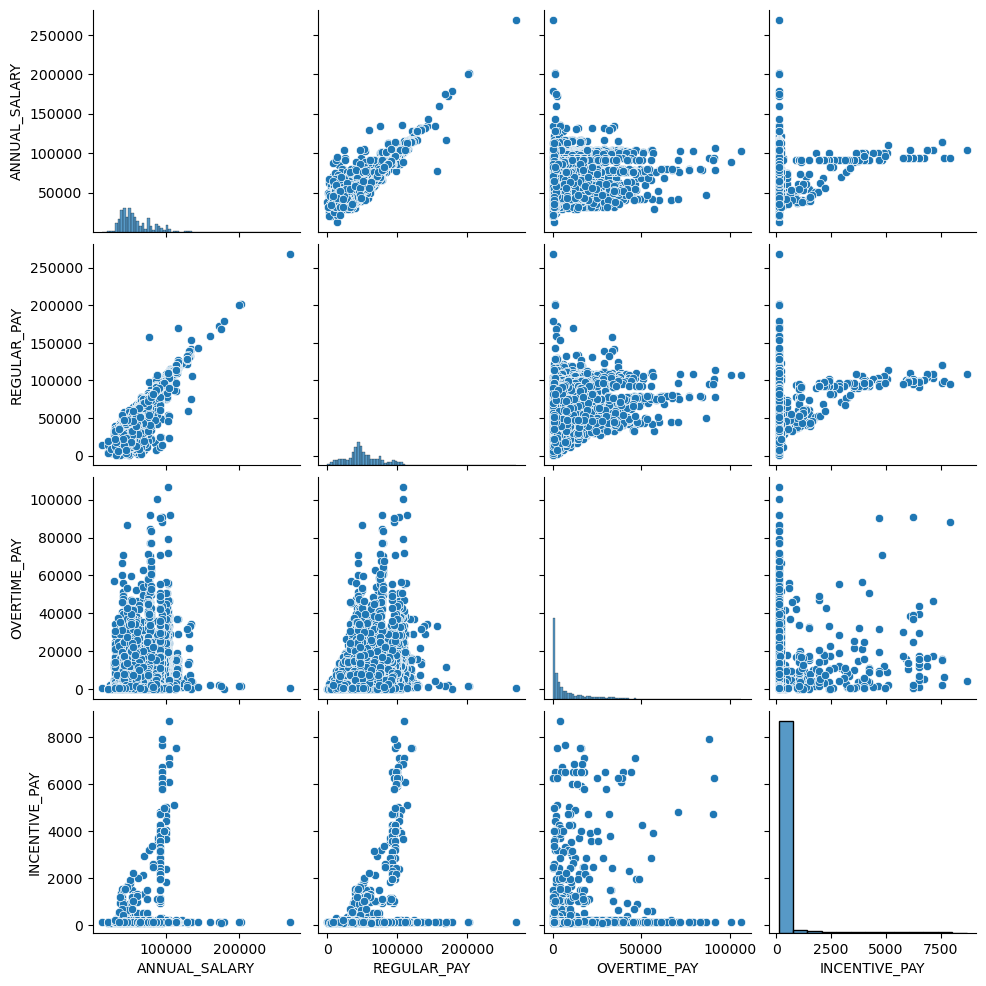

In [11]:
X = dataset.iloc[:, 12:16]
sns.pairplot(X)

In [12]:
# "Standardizing the dataset to ensure that all variables are on the same scale, preventing certain features from influencing the analysis due to differences in units or magnitude.
X = dataset.iloc[:, 12:16].values
sc_X = StandardScaler()
X = sc_X.fit_transform(X)

# Clustering (using K-Means)

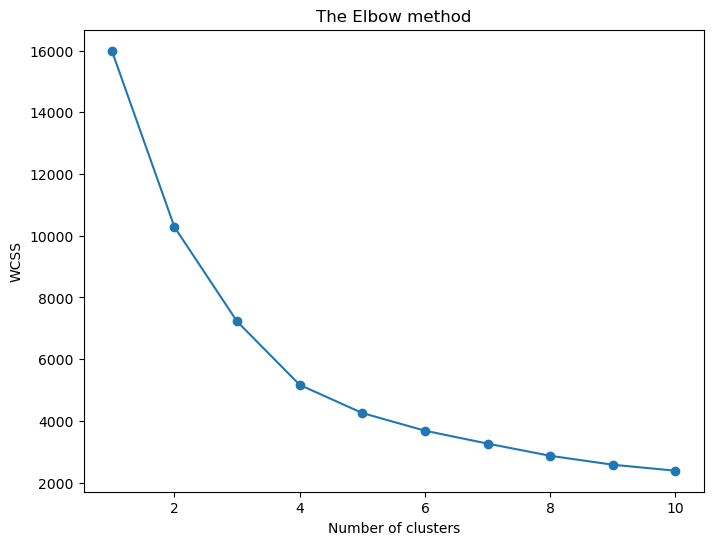

In [13]:
# using elbow method to find the optimal number of clusters
plt.figure(figsize=(8,6))
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

# Plotting the Elbow method
plt.plot(range(1, 11), wcss, marker='o')
plt.title('The Elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')  # WCSS stands for "Within-Cluster Sum of Squares"
plt.show()

In [14]:
# fitting the K-Means to the dataset
kmeans = KMeans(n_clusters=4, init='k-means++', random_state=42)
y_kmeans = kmeans.fit_predict(X)
dataset["kmeans_cluster"] = y_kmeans

In [15]:
dataset['kmeans_cluster'].value_counts()

kmeans_cluster
0    2512
2     860
1     537
3      90
Name: count, dtype: int64

In [16]:
pca=PCA(n_components=2)
X_reduced = pca.fit_transform(X)

pca.explained_variance_ratio_

array([0.52980021, 0.22572603])

In [17]:
sum(pca.explained_variance_ratio_)

0.7555262380228823

## visualising the clusters

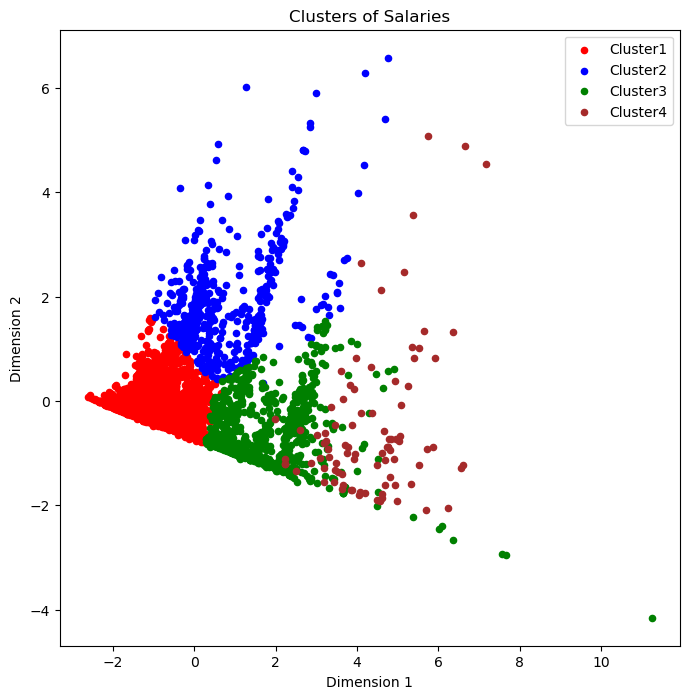

In [18]:
# Colour Range
colours = ['red', 'blue', 'green', 'brown', 'black']

plt.figure(figsize=(8,8))
for i in range(4):
    plt.scatter(X_reduced[y_kmeans == i, 0], X_reduced[y_kmeans == i, 1], s =20, c = colours[i], label = 'Cluster' + str(i+1))

plt.title('Clusters of Salaries')
plt.xlabel('Dimension 1')
plt.ylabel('Dimension 2')
plt.legend()
plt.show()

In [19]:
# Droping Columns not needed
new_dataset = dataset.drop(columns=['FIRST_NAME', 'LAST_NAME', 'Combo Name', 'DEPARTMENT', 'JOB_TITLE'])

In [20]:
from sklearn.preprocessing import LabelEncoder
# Assigning numerical values to the categorical columns
categorical_columns = new_dataset.select_dtypes(include=['object']).columns

label_encoder = LabelEncoder()

for column in categorical_columns:
    new_dataset[column] = label_encoder.fit_transform(new_dataset[column])

In [21]:
grouped_kmeans = new_dataset.groupby('kmeans_cluster')
cluster_kmeans = grouped_kmeans.mean()
print(cluster_kmeans)

                ELECTED_OFFICIAL  DATE_STARTED       SEX  ETHNICITY  \
kmeans_cluster                                                        
0                            0.0    749.633758  0.452229   4.303344   
1                            0.0    696.121043  0.612663   4.262570   
2                            0.0    736.986047  0.638372   4.659302   
3                            0.0    661.044444  0.877778   4.833333   

                ORIG_START   DATE_TERM  PAY_STATUS  ANNUAL_SALARY  \
kmeans_cluster                                                      
0               641.835191  211.330016    0.168392   47900.228977   
1               571.603352  226.324022    0.026071   60870.256145   
2               604.987209  225.189535    0.031395   88046.276826   
3               567.500000  228.966667    0.011111   94383.211333   

                 REGULAR_PAY  OVERTIME_PAY  INCENTIVE_PAY      GROSS_PAY  
kmeans_cluster                                                            
0       

In [24]:
from sklearn.cluster import AgglomerativeClustering
from sklearn.datasets import make_blobs

In [25]:
# Generate some sample data
X, y_true = make_blobs(n_samples=300, centers=4, cluster_std=0.6, random_state=0)

In [27]:
n_clusters = 4
agg_clustering = AgglomerativeClustering(n_clusters=n_clusters)
agg_clustering.fit(X)

AgglomerativeClustering(n_clusters=4)

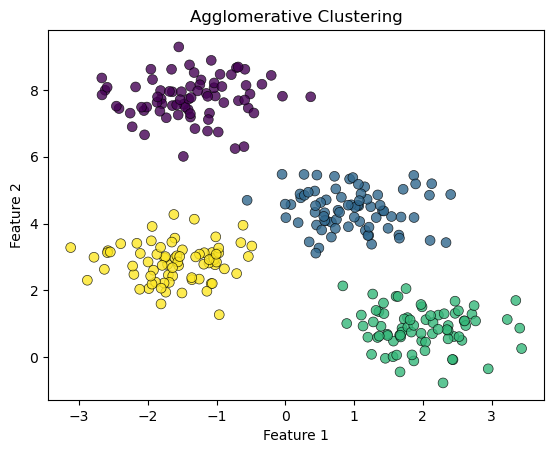

    FIRST_NAME   LAST_NAME               Combo Name               DEPARTMENT  \
0    CATHERINE       ABALO         ABALO, CATHERINE    Kane Regional Centers   
2        JOY M      ABBOTT            ABBOTT, JOY M    Kane Regional Centers   
4      JASMINE       ABRAM           ABRAM, JASMINE     Emergency Management   
5  GWENDOLYN S  ABRAMOVITZ  ABRAMOVITZ, GWENDOLYN S  Administrative Services   
6      KIARA N  ACIE-SCOTT      ACIE-SCOTT, KIARA N    Kane Regional Centers   

                        JOB_TITLE  ELECTED_OFFICIAL DATE_STARTED SEX  \
0               NURSING ASSISTANT                 0       4/8/10   F   
2                            COOK                 0      2/14/99   F   
4       TELECOMMUNICATION OFFICER                 0      5/23/22   F   
5            MANAGER REGISTRATION                 0     12/31/00   F   
6  FOOD SERVICE WORKER/START 2013                 0      8/23/15   F   

                        ETHNICITY ORIG_START DATE_TERM PAY_STATUS  \
0                

In [29]:
# Visualize the clusters
colors = ['red', 'blue', 'green', 'brown', 'black']
plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis', edgecolor='k', s=50, 
            linewidths=0.5, alpha=0.8, marker='o', facecolors=[colors[label] for label in labels])
plt.title('Agglomerative Clustering')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()

# View the updated dataset with appended clusters
print(dataset.head())